# Fickle Sentries 
This notebook explores a set of logic puzzles inspired by some puzzle types found in Raymond Smullyan's "The Lady or the Tiger?" and "What is the Name of this Book?".

The "Fickle Sentries" is a puzzle type that both 'lady or tiger' and 'lion and unicorn' puzzles have a strong family resemblance to, illustrating how those two puzzle types are closely related.

> You are at the entrance to a cave within which there is a treasure. The cave contains a treasure of one of copper, silver, gold, platinum, diamonds, or rubies. Out in front of the cave are two guards. If you can determine the contents of the cave based on the statements the guards make, the treasure is yours. Unfortunately, the guards are unreliable - the first guard lies whenever she is guarding copper, silver or gold, but tells the truth otherwise, and the second lies whenever she is guarding platinum, diamonds, or rubies, and tells the truth otherwise. 

In [1]:
allTreasures = ['copper','silver', 'gold', 'platinum', 'diamonds','rubies']
guard1_lies = ['copper','silver', 'gold']
guard2_lies = ['platinum', 'diamonds','rubies']
# given a list of treasures, what treasures are missing
def complement(listOfTreasure):
    return [treasure for treasure in allTreasures if treasure not in listOfTreasure]

guard1_truths = complement(guard1_lies)
guard2_truths = complement(guard2_lies)
print("Guard 1 tells the truth when guarding" + str(guard1_truths))
print("Guard 2 tells the truth when guarding" + str(guard2_truths))

Guard 1 tells the truth when guarding['platinum', 'diamonds', 'rubies']
Guard 2 tells the truth when guarding['copper', 'silver', 'gold']


In [2]:
# return the treasures common to two lists
def intersect(a, b):
    return [item for item in a if item in b]
    
# return the treasures in both lists
def union(a, b):
    return list(a) + [item for item in b if item not in a]
    

In [3]:
# each guard may claim that it is a specific treasure in the cave
statements = list(allTreasures)
# each guard may claim that it is not a specific treasure in the cave
statements = list(statements) + [complement(item) for item in allTreasures]
#each guard may claim that it is one of two given treasures in the cave
for t in allTreasures:
    for s in allTreasures:
        if s != t:
            statements = union(statements, [[s,t]])
print(len(statements))


42


In [4]:
def treasureFromStatements(g1_statement, g2_statement, output=False):
    g1t = intersect(g1_statement, guard1_truths) 
    g1l = intersect(complement(g1_statement), guard1_lies)
    guard1 = union(g1t, g1l)
    if (output):
        print('guard 1 possibilities: ' + str(guard1))
    g2t = intersect(g2_statement, guard2_truths) 
    g2l = intersect(complement(g2_statement), guard2_lies)
    guard2 = union(g2t, g2l)
    if (output):
        print('guard 2 possibilities: ' + str(guard2))
    hiddenTreasure = intersect(guard1,guard2)
    if (output):
        print(str(hiddenTreasure))
    if (len(hiddenTreasure) == 1):
        return hiddenTreasure[0]
    else:
        return None

In [5]:
print(treasureFromStatements(["rubies"],["rubies","diamonds"]))

None


In [6]:
puzzleCount = 0;
for g1_statement in statements:
    for g2_statement in statements :
        treasure = treasureFromStatements(g1_statement,g2_statement)
        if (treasure != None):
            print("--------------------------")            
            print("puzzle with solution found")
            print("--------------------------")
            print("guard 1 says: " + str(g1_statement))
            print("guard 2 says: " + str(g2_statement))
            print("solution is: " + treasure)
            print("--------------------------")
            puzzleCount = puzzleCount + 1
print("Found " + str(puzzleCount) + " puzzles.")

--------------------------
puzzle with solution found
--------------------------
guard 1 says: copper
guard 2 says: ['copper', 'gold', 'platinum', 'diamonds', 'rubies']
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: copper
guard 2 says: ['copper', 'silver', 'platinum', 'diamonds', 'rubies']
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: copper
guard 2 says: ['silver', 'copper']
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: copper
guard 2 says: ['gold', 'copper']
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: copper
guard 2 says: ['copper', 'silver']
solution is: silver
--------------------------
--------------------

--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'silver', 'gold', 'diamonds', 'rubies']
guard 2 says: ['diamonds', 'copper']
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'silver', 'gold', 'diamonds', 'rubies']
guard 2 says: ['rubies', 'copper']
solution is: diamonds
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'silver', 'gold', 'diamonds', 'rubies']
guard 2 says: ['diamonds', 'silver']
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'silver', 'gold', 'diamonds', 'rubies']
guard 2 says: ['rubies', 'silver']
solution is: diamonds
--------------------------
--------------------------
puzzle with solution found
--------------------------

guard 1 says: ['gold', 'copper']
guard 2 says: ['silver', 'gold', 'platinum', 'diamonds', 'rubies']
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['gold', 'copper']
guard 2 says: ['copper', 'silver', 'platinum', 'diamonds', 'rubies']
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['gold', 'copper']
guard 2 says: ['copper', 'silver', 'gold', 'diamonds', 'rubies']
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['gold', 'copper']
guard 2 says: ['copper', 'silver', 'gold', 'platinum', 'rubies']
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['gold', 'copper']
guard 2 says: ['copper', 'silver', 'gold', 'platinum', 'd

solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'silver']
guard 2 says: ['gold', 'silver']
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'silver']
guard 2 says: ['copper', 'gold']
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'silver']
guard 2 says: ['silver', 'gold']
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'silver']
guard 2 says: ['platinum', 'gold']
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'silver']
guard 2 says: ['diamonds', 'gold']
solution is: gold
--------

puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'silver']
guard 2 says: ['silver', 'diamonds']
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'silver']
guard 2 says: ['platinum', 'diamonds']
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'silver']
guard 2 says: ['copper', 'rubies']
solution is: copper
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'silver']
guard 2 says: ['gold', 'rubies']
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'gold']
guard 2 says: ['silver', 'gold', 'platinum', 'diamonds', 'rubies']
solution is: silver
--------------------------
-----

guard 1 says: ['rubies', 'gold']
guard 2 says: platinum
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'gold']
guard 2 says: diamonds
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'gold']
guard 2 says: ['silver', 'gold', 'platinum', 'diamonds', 'rubies']
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'gold']
guard 2 says: ['copper', 'gold', 'platinum', 'diamonds', 'rubies']
solution is: copper
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'gold']
guard 2 says: ['rubies', 'copper']
solution is: copper
--------------------------
--------------------------
puzzle with solution found
-------

--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'diamonds']
guard 2 says: ['diamonds', 'platinum']
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'diamonds']
guard 2 says: ['rubies', 'platinum']
solution is: diamonds
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'diamonds']
guard 2 says: ['platinum', 'diamonds']
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['rubies', 'diamonds']
guard 2 says: ['platinum', 'rubies']
solution is: diamonds
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: ['copper', 'rubies']
guard 2 says: copper
solution is: rubies
--------------------------


In [7]:
print("Using an inital list of " + str(len(statements)) + " statements")     
print(str(puzzleCount) + " puzzles were found.")


Using an inital list of 42 statements
624 puzzles were found.


To make things more interesting, we notice that, in this world at least, copper is less valuale than silver, silver is less valuable than gold, gold is less valuable than platinum, platinum is less valuable than diamonds, and diamonds are less valuable than rubies.

copper < silver < gold < platinum < diamonds < rubies

In [8]:
def moreValuable (treasure):
    pos = allTreasures.index(treasure)
    if (pos + 1) == len(allTreasures):
        return []
    return allTreasures[(pos +1):len(allTreasures)]

In [9]:
moreValuable("gold")

['platinum', 'diamonds', 'rubies']

In [10]:
def lessValuable (treasure):
    pos = allTreasures.index(treasure)
    if (pos) == 0:
        return []
    return allTreasures[0:pos]

In [11]:
intersect(lessValuable('gold'), [])

[]

In [12]:
lessValuable("gold")

['copper', 'silver']

In [28]:
def simpleStatement(treasure):
    return {'statement': "The cave contains " + treasure + ".",'items':[treasure]}

def negativeStatement(treasure):
    return {'statement': "The cave does not contain " + treasure + ".", 'items': complement([treasure])}

def moreValuableStatement(treasure):
    return {'statement': "The treasure is more valuable than " + treasure +".", 'items': moreValuable(treasure)}

def lessValuableStatement(treasure):
    return {'statement': "The treasure is less valuable than " + treasure +".", 'items': lessValuable(treasure)}

def compoundStatement(t1, t2):
    return {'statement': "The treasure is either " + t1 +" or " + t2 + "." , 'items': [t1,t2]}
    


In [29]:
lessValuableStatement("gold")

{'statement': 'The treasure is less valuable than gold.',
 'items': ['copper', 'silver']}

In [34]:
annotatedStatements = []
for t in allTreasures:
    annotatedStatements.append(simpleStatement(t))
    annotatedStatements.append(negativeStatement(t))
    annotatedStatements.append(moreValuableStatement(t))
    annotatedStatements.append(lessValuableStatement(t))
    for s in allTreasures:
        if s == t:
            continue
        annotatedStatements.append(compoundStatement(t,s))
print (len(annotatedStatements))

54


In [38]:
treasureCounts = {}
for treasure in allTreasures:
    treasureCounts.update({treasure: 0})
    
def addTreasureCount(treasure):
    treasureCounts[treasure] = treasureCounts[treasure] +1

In [39]:
puzzleCount = 0;
for g1_statement in annotatedStatements:
    for g2_statement in annotatedStatements :
        if len(g1_statement['items']) == 0 or len(g2_statement['items']) == 0:
            continue   
        hiddenTreasure = treasureFromStatements(g1_statement['items'],g2_statement['items'])
        if (hiddenTreasure != None):
            print("--------------------------")            
            print("puzzle with solution found")
            print("--------------------------")
            print("guard 1 says: " + str(g1_statement['statement']))
            print("guard 2 says: " + str(g2_statement['statement']))
            print("solution is: " + str(hiddenTreasure))
            print("--------------------------")
            puzzleCount = puzzleCount + 1
            addTreasureCount(hiddenTreasure)
print("Found " + str(puzzleCount) + " puzzles.")

--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave contains copper.
guard 2 says: The treasure is either copper or silver.
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave contains copper.
guard 2 says: The treasure is either copper or gold.
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave contains copper.
guard 2 says: The cave contains silver.
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave contains copper.
guard 2 says: The cave does not contain silver.
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave contains copper.
guard 2 says: T

solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than silver.
guard 2 says: The treasure is either silver or copper.
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than silver.
guard 2 says: The treasure is either silver or platinum.
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than silver.
guard 2 says: The treasure is either silver or diamonds.
solution is: silver
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than silver.
guard 2 says: The treasure is either silver or rubies.
solution is: silver
------------------

guard 2 says: The treasure is either diamonds or platinum.
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave does not contain gold.
guard 2 says: The treasure is either diamonds or rubies.
solution is: platinum
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave does not contain gold.
guard 2 says: The treasure is either rubies or platinum.
solution is: diamonds
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave does not contain gold.
guard 2 says: The treasure is either rubies or diamonds.
solution is: platinum
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is more valuable than gold.
guard 2 says: The treasure is more valuable than silver.
so

--------------------------
guard 1 says: The cave does not contain platinum.
guard 2 says: The treasure is either gold or diamonds.
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave does not contain platinum.
guard 2 says: The treasure is either gold or rubies.
solution is: diamonds
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave does not contain platinum.
guard 2 says: The treasure is either platinum or diamonds.
solution is: rubies
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave does not contain platinum.
guard 2 says: The treasure is either platinum or rubies.
solution is: diamonds
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The cave does not c

--------------------------
guard 1 says: The treasure is more valuable than diamonds.
guard 2 says: The treasure is either rubies or gold.
solution is: gold
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than diamonds.
guard 2 says: The cave contains copper.
solution is: platinum
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than diamonds.
guard 2 says: The treasure is either copper or silver.
solution is: platinum
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than diamonds.
guard 2 says: The treasure is either copper or gold.
solution is: platinum
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The tr

--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than rubies.
guard 2 says: The cave does not contain platinum.
solution is: platinum
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than rubies.
guard 2 says: The treasure is more valuable than platinum.
solution is: platinum
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than rubies.
guard 2 says: The treasure is either platinum or copper.
solution is: diamonds
--------------------------
--------------------------
puzzle with solution found
--------------------------
guard 1 says: The treasure is less valuable than rubies.
guard 2 says: The treasure is either platinum or silver.
solution is: diamonds
--------------------------
--

In [36]:
print("Found " + str(puzzleCount) + " puzzles.")

Found 838 puzzles.


In [37]:
print(treasureFromStatements(['rubies'],['copper','gold'],True))

guard 1 possibilities: ['rubies', 'copper', 'silver', 'gold']
guard 2 possibilities: ['copper', 'gold', 'platinum', 'diamonds', 'rubies']
['rubies', 'copper', 'gold']
None


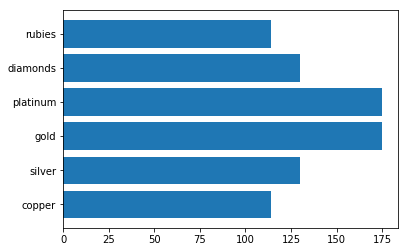

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


height = []
for t in treasureCounts:
    height.append(treasureCounts[t])
x_axis = np.arange(len(allTreasures))    
plt.barh(x_axis, height)
plt.yticks(x_axis, allTreasures)
plt.show()